In [10]:
import numpy as np
import matplotlib
import scipy
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.cross_validation as cv
import sklearn.linear_model as lm
import scipy.io
import sklearn.model_selection
import pandas
#importing data
file = 'ishi.csv' 
names = ['cement','slag','Fly ash','Water','SP','Coarse Aggr.','Fine Aggr.','SLUMP(cm)','FLOW(cm)','Compressive Strength (28-day)(Mpa)']
data=pandas.read_csv(file,names=names)

In [12]:
X=data.iloc[:, 0:6]#data
print (X)
Z=data.iloc[:, 8]# creating target
print(Z)

     cement   slag  Fly ash  Water    SP  Coarse Aggr.
1     273.0   82.0    105.0  210.0   9.0         904.0
2     163.0  149.0    191.0  180.0  12.0         843.0
3     162.0  148.0    191.0  179.0  16.0         840.0
4     162.0  148.0    190.0  179.0  19.0         838.0
5     154.0  112.0    144.0  220.0  10.0         923.0
6     147.0   89.0    115.0  202.0   9.0         860.0
7     152.0  139.0    178.0  168.0  18.0         944.0
8     145.0    0.0    227.0  240.0   6.0         750.0
9     152.0    0.0    237.0  204.0   6.0         785.0
10    304.0    0.0    140.0  214.0   6.0         895.0
11    145.0  106.0    136.0  208.0  10.0         751.0
12    148.0  109.0    139.0  193.0   7.0         768.0
13    142.0  130.0    167.0  215.0   6.0         735.0
14    354.0    0.0      0.0  234.0   6.0         959.0
15    374.0    0.0      0.0  190.0   7.0        1013.0
16    159.0  116.0    149.0  175.0  15.0         953.0
17    153.0    0.0    239.0  200.0   6.0        1002.0
18    295.

In [13]:
#task0
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
storeMSEValues = []
storeR2Values=[]

for i in range(1,11):
   
    X_train, X_test, y_train, y_test = train_test_split(X, Z, test_size=0.174)# splitting data into train and test set
    model =LinearRegression()#applying regression on each fold
    model.fit(X_train,y_train)#fitting the model on each fold
    predicted = cross_val_predict(model, X_test, y_test, cv=5)#performance on testset
    rscore1=r2_score(y_test,predicted)#calculating cv score
    mse2=mean_squared_error(y_test,predicted)#calculating mse
    (storeMSEValues.append(mse2))
    (storeR2Values.append(rscore1))
    
print(storeMSEValues)
print(storeR2Values)

[556.4982158558053, 406.60315922447757, 585.837949013739, 387.67684335867625, 107.78163825483868, 143.175404055351, 344.8891086741452, 185.24619442192335, 283.23659356388447, 256.24228608397055]
[-0.722468858329629, -0.3473319518575828, -1.9726752124668678, -0.3970378650699, 0.37946988165273066, 0.6108850017180232, 0.08579037341064888, 0.329315614405454, -0.23615793087946146, -0.06786460639925762]


181.1185086749484


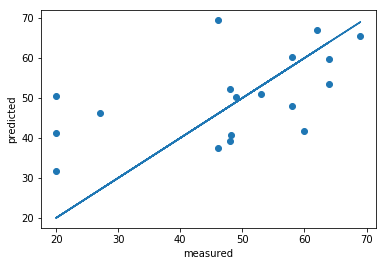

In [25]:
#task1
#Linear regression
from sklearn.linear_model import LinearRegression
reg=LinearRegression()#creating a linear regression model
reg.fit(X_train,y_train)#fitting the data
mselinear=mean_squared_error(y_test,reg.predict(X_test))
print(mselinear)
plt.scatter(y_test,reg.predict(X_test))
plt.xlabel('measured')
plt.ylabel('predicted')
plt.plot(y_test,y_test)


In [39]:
#task 1 for ridge regression
#finding the optimized alpha
from sklearn.linear_model import RidgeCV
alpharidge=10**np.linspace(10,-2,50)*0.5 #creating different values for the regularization parameter
ridgeregCV= RidgeCV(alphas = alpharidge, scoring = 'neg_mean_squared_error', normalize = True)#creating a ridge regression model for cross validation
ridgeregCV.fit(X_train,y_train)
print("alpha:", ridgeregCV.alpha_)# best value for alpha
#Ridge regression with optimized alpha and coefficients
ridge2= Ridge(alpha=ridgeregCV.alpha_,normalize=True)
ridge2.fit(X_train,y_train)
print(ridge2.coef_)
predreg=ridge2.predict(X_test)
mseridge=mean_squared_error(y_test,predreg)
print(mseridge)







alpha: 0.14735258512759047
[-3.21570072e-03 -7.86394572e-02 -1.15001660e-04  4.38973846e-01
 -1.42855180e-01 -2.56075434e-02]
184.22450949077745


[5.00000000e+09 2.84493301e+09 1.61872877e+09 9.21034985e+08
 5.24056567e+08 2.98181166e+08 1.69661089e+08 9.65348864e+07
 5.49270571e+07 3.12527596e+07 1.77824015e+07 1.01179482e+07
 5.75697700e+06 3.27564278e+06 1.86379686e+06 1.06047544e+06
 6.03396320e+05 3.43324423e+05 1.95346997e+05 1.11149824e+05
 6.32427608e+04 3.59842837e+04 2.04745753e+04 1.16497591e+04
 6.62855683e+03 3.77156003e+03 2.14596713e+03 1.22102655e+03
 6.94747747e+02 3.95302161e+02 2.24921633e+02 1.27977396e+02
 7.28174239e+01 4.14321386e+01 2.35743318e+01 1.34134790e+01
 7.63208984e+00 4.34255687e+00 2.47085668e+00 1.40588435e+00
 7.99929360e-01 4.55149089e-01 2.58973734e-01 1.47352585e-01
 8.38416468e-02 4.77047738e-02 2.71433772e-02 1.54442180e-02
 8.78755312e-03 5.00000000e-03]


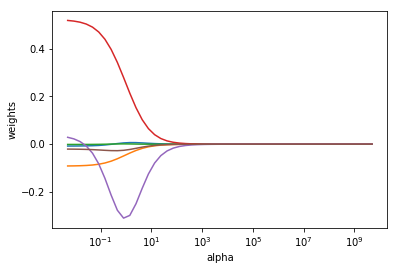

In [34]:
#task2for ridge
#Ridge   
from sklearn.linear_model import Ridge
ridgeReg = Ridge(normalize=True)#creating a ridge model
coefridge=[]#creating an array for coefficients
alpharidge=10**np.linspace(10,-2,50)*0.5 #creating different values for the regularization parameter
print (alpharidge)
for a in alpharidge:   #ridge regression using different values of alpha
    ridgeReg.set_params(alpha=a)
    ridgeReg.fit(X_train,y_train)
    ridgeReg.coef_
    coefridge.append(ridgeReg.coef_)
    pred1 = ridgeReg.predict(X_test)

ax=plt.gca() #plotting regularization graph path for ridge regression 
ax.plot(alpharidge,coefridge)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

In [40]:
#task1 for Lasso 
#finding the optimized alpha
from sklearn.linear_model import LassoCV
alphalasso=10**np.linspace(10,-2,50)*0.5#creating an aaray for different values of alpha
lassoregCV= LassoCV(alphas = alphalasso, normalize = True)#Lasso regression with cross validation
lassoregCV.fit(X_train,y_train)
print("alpha:", lassoregCV.alpha_)#finding the best alpha
#Lasso regression with optimized alpha and coefficients
lasso2= Lasso(alpha=lassoregCV.alpha_,normalize=True)#using the best alpha to perform the lasso regression
lasso2.fit(X_train,y_train)
print(lasso2.coef_)
predlasso=lasso2.predict(X_test)
mselasso=mean_squared_error(y_test,predlasso)
print(mselasso)


alpha: 0.14735258512759047
[ 0.         -0.06050085  0.          0.50535437 -0.         -0.0013926 ]
177.94447764812048


[5.00000000e+09 2.84493301e+09 1.61872877e+09 9.21034985e+08
 5.24056567e+08 2.98181166e+08 1.69661089e+08 9.65348864e+07
 5.49270571e+07 3.12527596e+07 1.77824015e+07 1.01179482e+07
 5.75697700e+06 3.27564278e+06 1.86379686e+06 1.06047544e+06
 6.03396320e+05 3.43324423e+05 1.95346997e+05 1.11149824e+05
 6.32427608e+04 3.59842837e+04 2.04745753e+04 1.16497591e+04
 6.62855683e+03 3.77156003e+03 2.14596713e+03 1.22102655e+03
 6.94747747e+02 3.95302161e+02 2.24921633e+02 1.27977396e+02
 7.28174239e+01 4.14321386e+01 2.35743318e+01 1.34134790e+01
 7.63208984e+00 4.34255687e+00 2.47085668e+00 1.40588435e+00
 7.99929360e-01 4.55149089e-01 2.58973734e-01 1.47352585e-01
 8.38416468e-02 4.77047738e-02 2.71433772e-02 1.54442180e-02
 8.78755312e-03 5.00000000e-03]


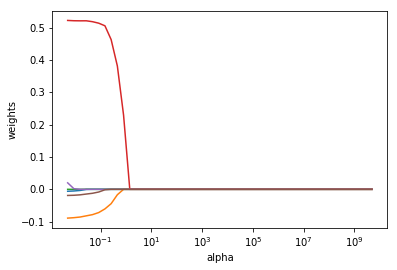

In [41]:
#task 2 for Lasso Regression
#Lasso
from sklearn.linear_model import Lasso
lassoReg = Lasso(normalize=True)#creating a lasso regression model
coeflasso=[]#creating an array for coefficients
alphalasso=10**np.linspace(10,-2,50)*0.5#creating an aaray for different values of alpha
print (alphalasso)
#lasso regression using different values of alpha
for a in alphalasso:
    lassoReg.set_params(alpha=a)
    lassoReg.fit(X_train,y_train)
    lassoReg.coef_
    coeflasso.append(lassoReg.coef_)
    pred2 = lassoReg.predict(X_test)

ax=plt.gca()  #plotting the regularization paths for lasso regression
ax.plot(alphalasso,coeflasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()





